 Load the dataset (csv file) into a Pandas DataFrame.

In [167]:
import pandas as pd
df = pd.read_csv('the-hello-dataset-fa22.csv')


,Name,Gender,HSSC-1,HSSC-2,CGPA,FavoriteColor,BirthMonth,Weight
0,Muhammad Usman,Male,440,369,2.8,Black,March,77
1,Taha Ishfaq,Male,415,408,2.73,Red,March,72
2,Muhammad Hamdan,Male,388,321,2.78,Black,October,53
3,Syeda Maham Gillani,Female,412,440,3.11,Blue,February,63
4,Umar Wasim,Male,364,469,2.42,black,October,80
...,...,...,...,...,...,...,...,...
129,M Abubakar Malik,Male,410,349,2.94,Blue,Feburary,65
130,Muhammad Ali,Male,403,390,2.52,Yellow,October,81
131,shafaqat ali,Male,424,824,3.07,Black,May,58
132,Ammar Asif,Male,351,423,2.52,Black,December,68


Manually view the dataset, and see if it requires any cleaning/normalization

In [168]:
import re
def HSSC_Clean(y):
    if re.match(r"\d\d?\d?%", y):
        y = y.strip("%")
        y = int(y)/100 * 510
    if re.match(r"\d\d?\d?\/\d\d\d", str(y)):
        y = y[  : 3: 1]
    if re.match(r"\d{3}\s\(total\)", str(y)):
        y = y[  : 3: 1]
        
    return y

df['CGPA'] = [x.strip(".") for x in df['CGPA']]
hssc1 = []

df['HSSC-1'] = [HSSC_Clean(str(y)) for y in df['HSSC-1']]
df['HSSC-2'] = [HSSC_Clean(str(y)) for y in df['HSSC-2']]


df["FavoriteColor"] = [s.lower() for s in df['FavoriteColor']]
df["FavoriteColor"] =  [x.strip() for x in df['FavoriteColor']]


    

df['CGPA'] = df['CGPA'].astype(float)
df['HSSC-1'] = df['HSSC-1'].astype(int)
df['HSSC-2'] = df['HSSC-2'].astype(int)

Print the list of all students whose first name starts with letter the 'H'

In [169]:
filt = df['Name'].str.match(r'^H')
filtered_df = df[filt]
print(filtered_df['Name'])

9             Hamza Naveed
21             Habib Ullah
22            Hunain Javed
58    Hafiz Malahim Labib.
60     HAMNA TARIQ SALEEMI
77                    Hina
78        Hamza Javed Khan
80          Husnain Ahmed 
93        Hamayoun Masroor
98           Hussain afzal
Name: Name, dtype: object


In [170]:
filt = df['Name'].str.match(r'\w+ \w+ \w+')
filtered_df1 = df[filt]
print(f"Total Students with 3 word name: {filtered_df1.shape[0]}")

Total Students with 3 word name: 43


In [171]:
df.shape[0]

134

Print the percentage of students who have a CGPA of 3.0 or above.

In [172]:
filt = df['CGPA'] >= 3.0 
theatas = df[filt].shape[0]
print(theatas)
print(f"{round(theatas/df.shape[0] * 100, 2)}% students have CGPA above 3.0")

38
28.36% students have CGPA above 3.0


Plot a pie chart to show the ratio of male and female students.


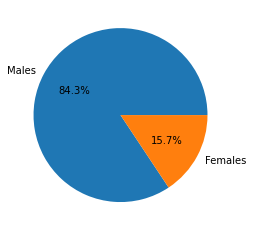

In [173]:
import matplotlib.pyplot as plt

males = df[df['Gender'].str.match(r'\b[Mm]ale')].shape[0]
females =  df.shape[0] - males

gender = ['Males', 'Females']
data = [males, females]
plt.pie(data, labels = gender, autopct='%1.1f%%')
plt.show()

Plot the CGPA of all male students on a histogram with intervals 2.0-2.5, 2.6-3.0, 3.1-3.5, 3.6-4.0.

(array([12., 10., 63.,  6., 21.,  1.,  0.]),
 array([2. , 2.5, 2.6, 3. , 3.1, 3.5, 3.6, 4. ]),
 <BarContainer object of 7 artists>)

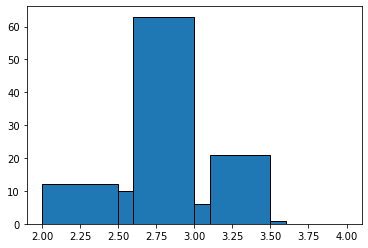

In [174]:
malesDf = df[df['Gender'].str.match(r'\b[Mm]ale')]
cgpaMales = malesDf['CGPA']

bins = [2.0,2.5, 2.6,3.0, 3.1,3.5, 3.6,4.0]

plt.hist(cgpaMales, bins = bins, edgecolor= 'black')


Plot the HSSC-1 marks of all male vs female students on a scatter plot.

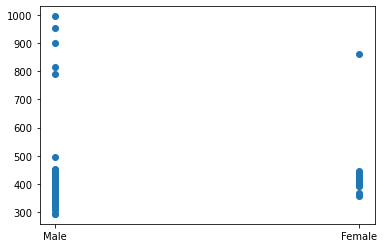

In [181]:
male = df[df['Gender'].str.match(r'\b[Mm]ale')]
maleMarks = male['HSSC-1']
maleG = male['Gender']


female = df[~df['Gender'].str.match(r'\b[Mm]ale')]
femaleMarks = female['HSSC-1']
femaleG = female['Gender']

maleMarks = maleMarks.tolist()
femaleMarks = femaleMarks.tolist()
maleG = maleG.tolist()
femaleG = femaleG.tolist()

maleMarks.extend(femaleMarks)
maleG.extend(femaleG)

marks = maleMarks
gender = maleG

plt.scatter(gender, marks)


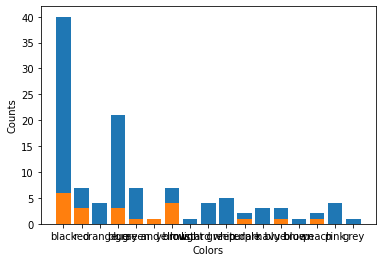

In [176]:
def countFavs(favColor):
    calculatedColors = []
    colors = []
    counts = []
    for color1 in favColor:
        if color1 in calculatedColors:
            continue
        count = 0
        for color2 in favColor:
            if color1 == color2:
                count += 1
        calculatedColors.append(color1)
        colors.append(color1)
        counts.append(count)
    return [colors, counts]




male = df[df['Gender'].str.match(r'\b[Mm]ale')]
maleFavColor = male['FavoriteColor']
maleG = male['Gender']

female = df[~df['Gender'].str.match(r'\b[Mm]ale')]
femaleFavColor = female['FavoriteColor']
femaleG = female['Gender']


maleFavColor = maleFavColor.tolist()
femaleFavColor = femaleFavColor.tolist()
maleG = maleG.tolist()
femaleG = femaleG.tolist()



x = countFavs(maleFavColor)
colorsM = x[0]
countsM = x[1]

y = countFavs(femaleFavColor)
colorsF = y[0]
countsF = y[1]

plt.bar(colorsM, countsM)
plt.bar(colorsF, countsF)
plt.xlabel("Colors")
plt.ylabel("Counts")
plt.show()


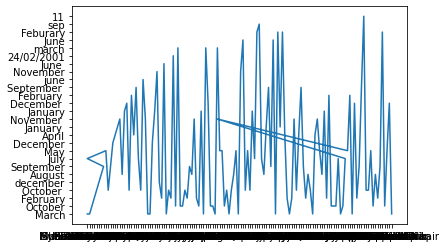

In [177]:
students = df['Name']
birhMonth = df['BirthMonth']

plt.plot(students, birhMonth)


Create a correlation matrix between HSSC-1 and HSSC-2 marks and then plot on a heatmap.

          HSSC-1    HSSC-2
HSSC-1  1.000000  0.131248
HSSC-2  0.131248  1.000000


<AxesSubplot:>

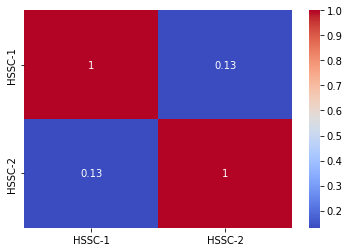

In [180]:
import numpy as np
import seaborn
marks = df[['HSSC-1','HSSC-2' ]]
corM = marks.corr()
seaborn.heatmap(corM, annot=True, cmap='coolwarm')


